In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.collections import PatchCollection
import seaborn as sns
import numpy as np

In [14]:
dxy=pd.read_csv('ntII-ntIIIa_500kb10kb_dxy.txt', sep="\t")
dxy.head()

,chr,pos,dxy
0,Chromosome_1,250001,0.010942
1,Chromosome_1,260001,0.010942
2,Chromosome_1,270001,0.010942
3,Chromosome_1,280001,0.010942
4,Chromosome_1,290001,0.010942


In [15]:
# Import things needed to plot in one figure
# chromosome file
bed =pd.read_csv('chr.bed', sep="\t")
chrLengs=bed['end']
chrGap= 10000000
    # genes
genes =pd.read_csv('all_genes_plotted.txt', sep="\t")
#add info for plotting, i.e. how much to add to each side of the gene to make 1 Mb plots
genes['z']=250000+((500000+genes['Start']-genes['Stop'])/2)

In [16]:
# fix the positions
pos_add=[]

for row in dxy['chr']:
    if row=='Chromosome_1':
        pos_add.append(0)
    elif row=='Chromosome_2':
        pos_add.append(np.cumsum(chrLengs)[0]+chrGap*1)
    elif row=='Chromosome_3':
        pos_add.append(np.cumsum(chrLengs)[1]+chrGap*2)
    elif row=='Chromosome_4':
        pos_add.append(np.cumsum(chrLengs)[2]+chrGap*3)
    elif row=='Chromosome_5':
        pos_add.append(np.cumsum(chrLengs)[3]+chrGap*4)
    elif row=='Chromosome_6':
        pos_add.append(np.cumsum(chrLengs)[4]+chrGap*5)
    elif row=='Chromosome_7':
        pos_add.append(np.cumsum(chrLengs)[5]+chrGap*6)
    elif row=='Chromosome_8':
        pos_add.append(np.cumsum(chrLengs)[6]+chrGap*7)
    elif row=='Chromosome_9':
        pos_add.append(np.cumsum(chrLengs)[7]+chrGap*8)
    else:
        pos_add.append(0)
dxy['pos_add']=pos_add
dxy['pos_fixed']=dxy['pos']+dxy['pos_add']
dxy.head()

,chr,pos,dxy,pos_add,pos_fixed
0,Chromosome_1,250001,0.010942,0,250001
1,Chromosome_1,260001,0.010942,0,260001
2,Chromosome_1,270001,0.010942,0,270001
3,Chromosome_1,280001,0.010942,0,280001
4,Chromosome_1,290001,0.010942,0,290001


In [17]:
# get the average and define outliers
m=np.nanmean(dxy['dxy'])
l=0.007279532
u=0.02197602
print(m, l, u)

0.015606691240520687 0.007279532 0.02197602


In [18]:
# add color ONLY NEEDED IF PLOTTING TOGETHER
col_add=[]
for row in dxy['chr']:
    if row=='Chromosome_1':
        col_add.append('lightgrey')
    elif row=='Chromosome_2':
        col_add.append('darkgrey')
    elif row=='Chromosome_3':
        col_add.append('lightgrey')
    elif row=='Chromosome_4':
        col_add.append('darkgrey')
    elif row=='Chromosome_5':
        col_add.append('lightgrey')
    elif row=='Chromosome_6':
        col_add.append('darkgrey')
    elif row=='Chromosome_7':
        col_add.append('lightgrey')
    elif row=='Chromosome_8':
        col_add.append('darkgrey')
    elif row=='Chromosome_9':
        col_add.append('lightgrey')
    else:
        pos_add.append('blue')
dxy['col']=col_add
dxy.head()

,chr,pos,dxy,pos_add,pos_fixed,col
0,Chromosome_1,250001,0.010942,0,250001,lightgrey
1,Chromosome_1,260001,0.010942,0,260001,lightgrey
2,Chromosome_1,270001,0.010942,0,270001,lightgrey
3,Chromosome_1,280001,0.010942,0,280001,lightgrey
4,Chromosome_1,290001,0.010942,0,290001,lightgrey


In [20]:
# add outliercolor 
col_add2=[]
for row in dxy['dxy']:
    if row > u:
        col_add2.append('orange')
    elif row < l:
        col_add2.append('blue')
    else:
        col_add2.append('darkgrey')
dxy['colout']=col_add2
dxy.head()

,chr,pos,dxy,pos_add,pos_fixed,col,colout
0,Chromosome_1,250001,0.010942,0,250001,lightgrey,darkgrey
1,Chromosome_1,260001,0.010942,0,260001,lightgrey,darkgrey
2,Chromosome_1,270001,0.010942,0,270001,lightgrey,darkgrey
3,Chromosome_1,280001,0.010942,0,280001,lightgrey,darkgrey
4,Chromosome_1,290001,0.010942,0,290001,lightgrey,darkgrey


In [21]:
outliers=dxy[dxy['colout']=='orange']
pd.DataFrame.to_csv(outliers, 'ntIIntIIa_dxy_upper_out.txt', sep="\t", index=False)
outliers2=dxy[dxy['colout']=='blue']
pd.DataFrame.to_csv(outliers2, 'ntIIntIIa_dxy_lower_out.txt', sep="\t", index=False)

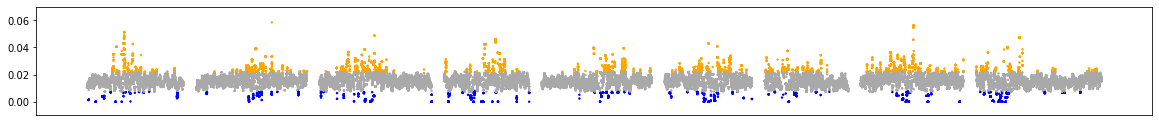

In [10]:
plt.figure(figsize=(20,2))
plt.ylim(-0.01,0.07)
plt.xticks([])
plt.scatter(dxy['pos_fixed'], 
            dxy['dxy'],
            c=dxy['colout'],s=2)
#plt.scatter(out_overlap['pos_fixed']+1, 
#            out_overlap['dxy'],
#            c='red',s=2)

In [19]:
out_overlap=pd.read_csv('fst_dxy_overlapp_simple_20200427.txt', sep="\t")
out_overlap.head()

,CHROM,BIN_START,BIN_END,N_VARIANTS,WEIGHTED_FST,MEAN_FST,MID,pos_add,pos_fixed,col,colout_fst,chr,pos,dxy,pos_add.1,pos_fixed.1,col.1,colout_dxy,colout_overlap
0,Chromosome_1,20200001,20700000,45,0.684735,0.572022,20450000,0,20450000,lightgrey,orange,Chromosome_1,20450001,0.024607,0,20450001,lightgrey,orange,red
1,Chromosome_1,20210001,20710000,45,0.684735,0.572022,20460000,0,20460000,lightgrey,orange,Chromosome_1,20460001,0.024607,0,20460001,lightgrey,orange,red
2,Chromosome_1,20220001,20720000,45,0.684735,0.572022,20470000,0,20470000,lightgrey,orange,Chromosome_1,20470001,0.024607,0,20470001,lightgrey,orange,red
3,Chromosome_1,20230001,20730000,45,0.684735,0.572022,20480000,0,20480000,lightgrey,orange,Chromosome_1,20480001,0.024607,0,20480001,lightgrey,orange,red
4,Chromosome_1,20240001,20740000,47,0.674176,0.561399,20490000,0,20490000,lightgrey,orange,Chromosome_1,20490001,0.024150,0,20490001,lightgrey,orange,red


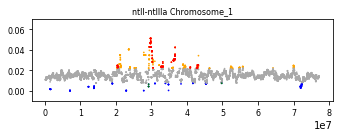

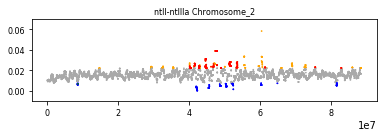

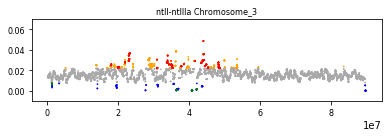

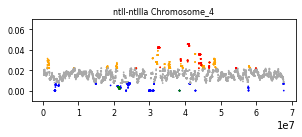

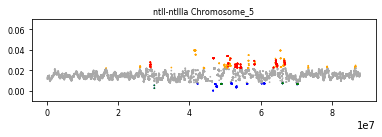

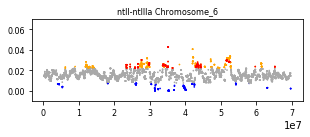

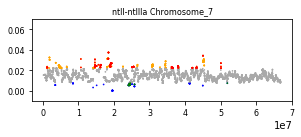

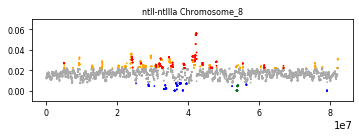

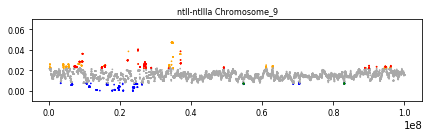

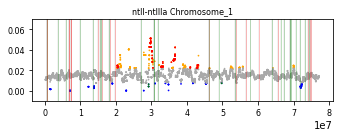

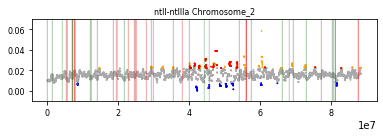

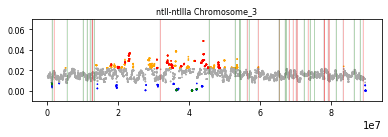

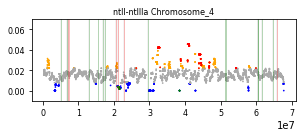

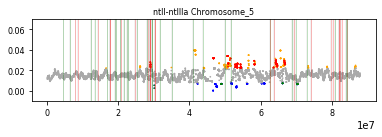

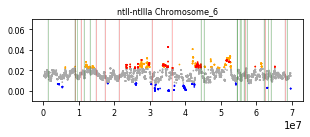

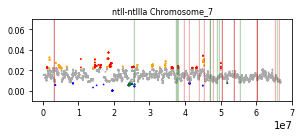

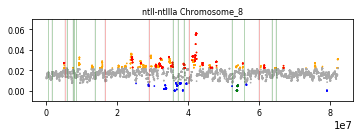

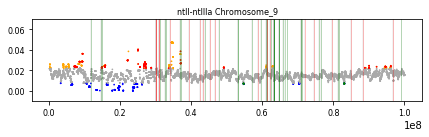

In [12]:
#plot all chromosomes
#define sizes of figures
figsize=(5.39,6.18,6.27,4.73,6.16,4.86,4.67,5.75,7)
# define the chromosomes
chrs=('Chromosome_1','Chromosome_2','Chromosome_3','Chromosome_4','Chromosome_5',
    'Chromosome_6','Chromosome_7','Chromosome_8','Chromosome_9')
#title of the plot
header='ntII-ntIIIa '

#plot all chromosomes with all the Fst-dxy overlap outliers
for size, chrom in zip(figsize, chrs):
    plt.figure(figsize=(size,1.5))
    plt.ylim(-0.01,0.07)
    title=header+str(chrom)
    plt.title(title, fontsize=8)
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
        #add the dxy data with the outliers colored
    plt.scatter(dxy.loc[dxy['chr']==str(chrom),'pos'],
                dxy.loc[dxy['chr']==str(chrom), 'dxy'],
                c=dxy.loc[dxy['chr']==str(chrom), 'colout'],s=0.5)
        #add the points with overlap in Fst ontop
    plt.scatter(out_overlap.loc[out_overlap['chr']==str(chrom),'pos'],
                out_overlap.loc[out_overlap['chr']==str(chrom),'dxy'],
                c=out_overlap.loc[out_overlap['chr']==str(chrom),'colout_overlap'],s=0.5)
    name=str(chrom)+'_ntII-ntIIIa_dxy_500kb10kb_90missing_mac21_outoverlap.png'
    plt.savefig(name, dpi=1200)
    
#plot all chromosomes with all the Fst-dxy overlap outliers and all genes and the boxes around the genes
for size, chrom in zip(figsize, chrs):
    plt.figure(figsize=(size,1.5))
    plt.ylim(-0.01,0.07)
    title=header+str(chrom)
    plt.title(title, fontsize=8)
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
        #add the dxy data with the outliers colored
    plt.scatter(dxy.loc[dxy['chr']==str(chrom),'pos'],
                dxy.loc[dxy['chr']==str(chrom), 'dxy'],
                c=dxy.loc[dxy['chr']==str(chrom), 'colout'],s=0.5)
        #add the points with overlap in Fst ontop
    plt.scatter(out_overlap.loc[out_overlap['chr']==str(chrom),'MID'],
                out_overlap.loc[out_overlap['chr']==str(chrom),'dxy'],
                c=out_overlap.loc[out_overlap['chr']==str(chrom),'colout_overlap'],s=0.5)
        # add the genes
    for mid,col in zip(genes.loc[genes['Chr']==str(chrom),'Mid'],genes.loc[genes['Chr']==str(chrom),'color']):
        plt.axvline(x=mid, c=col, linewidth=0.5,alpha=0.5)
        # add the poxes
            # define the list of paths
    geneboxes1 = []
            # make the paths
    for start, stop in zip(genes.loc[genes['Chr']==str(chrom),'Start'],
                           genes.loc[genes['Chr']==str(chrom),'Stop']):
        rect = pat.Rectangle(xy=(start-250000,-0.01),width=stop-start+500000,height=1.2,facecolor='grey', 
                         edgecolor='None', alpha=0.1)
        geneboxes1.append(rect)
            #add the poxes
    for i in geneboxes1:
        ax.add_patch(i)
        #name the plot and save
    name=str(chrom)+'_ntII-ntIIIa_dxy_500kb10kb_90missing_mac21_outoverlap_allgenes.png'
    plt.savefig(name, dpi=1200)

In [13]:
%%capture
# plot all genes in 1 Mb plots with the boxes around the genes
# define the chromosomes
chrs=('Chromosome_1','Chromosome_2','Chromosome_3','Chromosome_4','Chromosome_5',
    'Chromosome_6','Chromosome_7','Chromosome_8','Chromosome_9')
#title of the plot
header='ntII-ntIIIa '

for chrom in chrs:
        #take out the genes for the chromosome
    g=genes.loc[genes['Chr']==str(chrom),]
        #take out the locations of the xlim for each genes plot and make a dataframe
    d={'start':genes.loc[genes['Chr']==str(chrom),'Start']-genes.loc[genes['Chr']==str(chrom),'z'], 
        'stop':genes.loc[genes['Chr']==str(chrom),'Stop']+genes.loc[genes['Chr']==str(chrom),'z']}
    mbplots=pd.DataFrame(data=d)
    
        # title for each plot
    title=header+str(chrom)
    for x, y, z in zip(mbplots['start'],mbplots['stop'], range(1,len(g.index)+1)):
        plt.figure(figsize=(2,1.5))
        plt.ylim(-0.01,0.07)
        plt.xlim(x,y)
        plt.title(title, fontsize=8)
        ax = plt.gca()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
            #add the Fst data with the outliers colored
        plt.scatter(dxy.loc[dxy['chr']==str(chrom),'pos'],
                    dxy.loc[dxy['chr']==str(chrom), 'dxy'],
                    c=dxy.loc[dxy['chr']==str(chrom), 'colout'],s=0.5)
            #add the points with overlap in dxy ontop
        plt.scatter(out_overlap.loc[out_overlap['CHROM']==str(chrom),'pos'],
                    out_overlap.loc[out_overlap['CHROM']==str(chrom),'dxy'],
                    c=out_overlap.loc[out_overlap['CHROM']==str(chrom),'colout_overlap'],s=0.5)
            # add the genes
        for mid,col in zip(g['Mid'],g['color']):
            plt.axvline(x=mid, c=col, linewidth=0.5,alpha=0.5)
            # add the poxes
                # define the list of paths
        geneboxes1 = []
                # make the paths
        for start, stop in zip(g['Start'],g['Stop']):
            rect = pat.Rectangle(xy=(start-250000,-0.01),width=stop-start+500000,height=0.08,facecolor='grey', 
                                 edgecolor='None', alpha=0.1)
            geneboxes1.append(rect)
                #add the poxes
        for i in geneboxes1:
            ax.add_patch(i)
            #name the plot and save
        name=str(chrom)+'_ntII-ntIIIa_dxy_500kb10kb_90missing_mac21_outoverlap_'+str(z)+'.png'
        plt.savefig(name, dpi=1200)

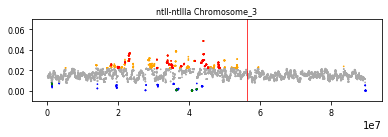

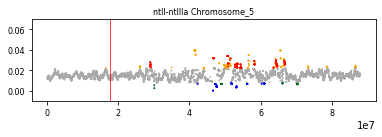

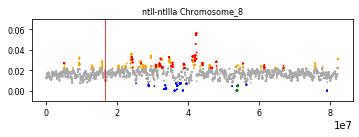

In [23]:
# adding in the location of each of the DE genes

#plot all chromosomes with all the Fst-dxy overlap outliers
    # Chr 3
plt.figure(figsize=(6.27,1.5))
plt.ylim(-0.01,0.07)
title='ntII-ntIIIa Chromosome_3'
plt.title(title, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
    #add the dxy data with the outliers colored
plt.scatter(dxy.loc[dxy['chr']=='Chromosome_3','pos'],
            dxy.loc[dxy['chr']=='Chromosome_3', 'dxy'],
            c=dxy.loc[dxy['chr']=='Chromosome_3', 'colout'],s=0.5)
    #add the points with overlap in Fst ontop
plt.scatter(out_overlap.loc[out_overlap['chr']=='Chromosome_3','pos'],
            out_overlap.loc[out_overlap['chr']=='Chromosome_3','dxy'],
            c=out_overlap.loc[out_overlap['chr']=='Chromosome_3','colout_overlap'],s=0.5)
plt.axvline(x=56339160, c='red', linewidth=0.75)
plt.savefig('Chromosome_3_ntII-ntIIIa_dxy_500kb10kb_90missing_mac21_outoverlap_DE.png', dpi=1200)

    # Chr 5
plt.figure(figsize=(6.16,1.5))
plt.ylim(-0.01,0.07)
title='ntII-ntIIIa Chromosome_5'
plt.title(title, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
    #add the dxy data with the outliers colored
plt.scatter(dxy.loc[dxy['chr']=='Chromosome_5','pos'],
            dxy.loc[dxy['chr']=='Chromosome_5', 'dxy'],
            c=dxy.loc[dxy['chr']=='Chromosome_5', 'colout'],s=0.5)
    #add the points with overlap in Fst ontop
plt.scatter(out_overlap.loc[out_overlap['chr']=='Chromosome_5','pos'],
            out_overlap.loc[out_overlap['chr']=='Chromosome_5','dxy'],
            c=out_overlap.loc[out_overlap['chr']=='Chromosome_5','colout_overlap'],s=0.5)
plt.axvline(x=17677627, c='red', linewidth=0.75)
plt.savefig('Chromosome_5_ntII-ntIIIa_dxy_500kb10kb_90missing_mac21_outoverlap_DE.png', dpi=1200)        

    # Chr 8
plt.figure(figsize=(5.75,1.5))
plt.ylim(-0.01,0.07)
title='ntII-ntIIIa Chromosome_8'
plt.title(title, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
    #add the dxy data with the outliers colored
plt.scatter(dxy.loc[dxy['chr']=='Chromosome_8','pos'],
            dxy.loc[dxy['chr']=='Chromosome_8', 'dxy'],
            c=dxy.loc[dxy['chr']=='Chromosome_8', 'colout'],s=0.5)
    #add the points with overlap in Fst ontop
plt.scatter(out_overlap.loc[out_overlap['chr']=='Chromosome_8','pos'],
            out_overlap.loc[out_overlap['chr']=='Chromosome_8','dxy'],
            c=out_overlap.loc[out_overlap['chr']=='Chromosome_8','colout_overlap'],s=0.5)
plt.axvline(x=16812396, c='red', linewidth=0.75)
plt.savefig('Chromosome_8_ntII-ntIIIa_dxy_500kb10kb_90missing_mac21_outoverlap_DE.png', dpi=1200)            